/home/cas/work/Projects/ML_predict_target_board_RGB_LED_state-ESP32-S3_CircuitPython/03_pc_linux_software/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       168
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00       172
           5       1.00      1.00      1.00       186
           6       1.00      1.00      1.00       177
           7       1.00      1.00      1.00       159

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



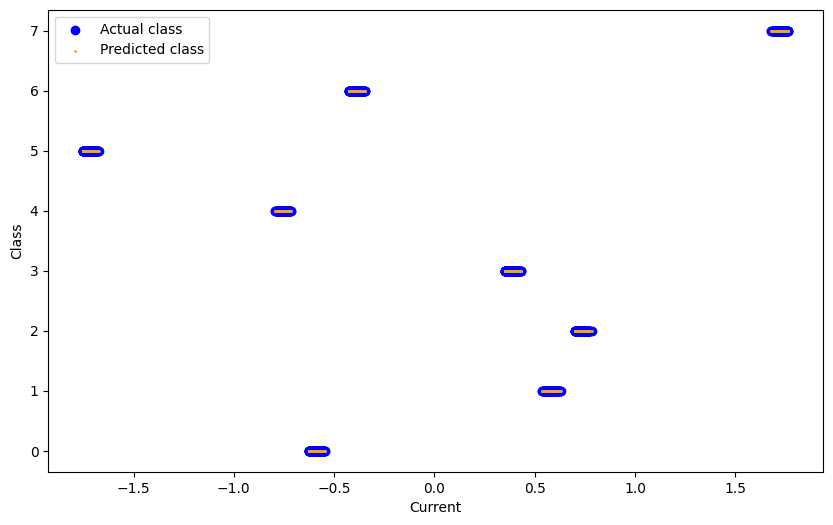

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read the data file
df = pd.read_csv("./labeled_dataset_2024.05.24-03h39m42s-rgb_combinations_labeled.csv", sep=',')
df = df.sort_values(by='current')

# Create separate lists for current and RGB values
x = df['current'].values.reshape(-1, 1)
y = df['rgb unique combination']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a simple MLP with one hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(3), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a scatter plot for the actual and predicted classes
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, label='Actual class', color='blue')
plt.scatter(X_test, y_pred, label='Predicted class', color='orange', s=1)
plt.xlabel('Current')
plt.ylabel('Class')
plt.legend()

plt.show()


/home/cas/work/Projects/ML_predict_target_board_RGB_LED_state-ESP32-S3_CircuitPython/03_pc_linux_software/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


weights: 
[array([[-1.60583449e-260,  4.52783737e-183,  9.25014972e+000,
        -7.23882416e+000, -8.75232543e+000]]), array([[-1.10226176e-196, -4.56298478e-198,  4.79457587e-221,
         2.00685028e-231, -1.22327849e-223],
       [-8.21395678e-224, -4.15462966e-251, -9.57778143e-303,
         1.34138744e-290,  8.32203877e-248],
       [ 5.53173951e+000, -9.99627258e-216,  2.43948903e-248,
        -2.72926798e+000, -4.86638112e-298],
       [-3.44768686e+000, -2.19624029e-228, -4.13058392e-305,
         6.55124510e+000,  7.50333901e-201],
       [-8.39982453e+000, -2.32163329e-221,  1.52430652e-203,
         1.07475904e+001, -5.65613280e-199]]), array([[-1.26622478e+000,  1.22530332e+000,  2.03466943e+000,
         6.91578146e-001, -2.86388918e+000, -6.05671604e+000,
        -1.17313609e-001,  2.67918178e+000],
       [ 1.89056257e-298, -2.09918971e-232, -2.55886420e-207,
        -2.88214226e-240, -6.26038678e-212,  2.22947079e-218,
        -2.89473714e-284, -9.62883494e-215],
     

/home/cas/work/Projects/ML_predict_target_board_RGB_LED_state-ESP32-S3_CircuitPython/03_pc_linux_software/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       158
           2       1.00      1.00      1.00       168
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00       172
           5       1.00      1.00      1.00       186
           6       1.00      1.00      1.00       177
           7       1.00      1.00      1.00       159

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340



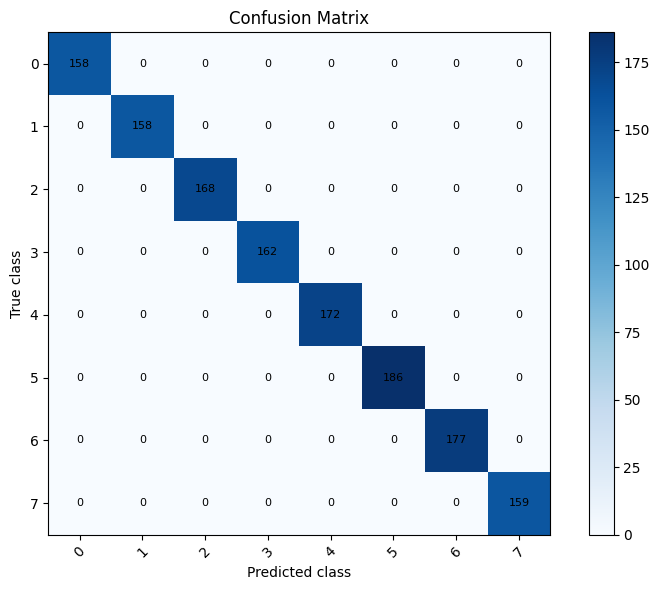

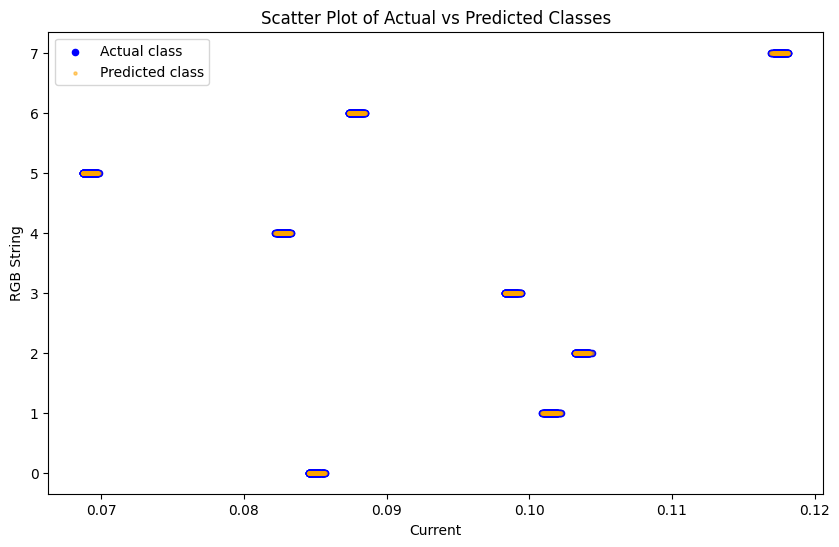

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read the data file
df = pd.read_csv("./labeled_dataset_2024.05.24-03h39m42s-rgb_combinations_labeled.csv", sep=',')
df = df.sort_values(by='current')

# Create separate lists for current and RGB values
x = df['current'].values.reshape(-1, 1)
y = df['rgb unique combination']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features (important for neural networks)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Initialize the MLPClassifier with one hidden layer and set the number of classes as the output layer size
# Train a simple MLP with one hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(5,5), activation='relu', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Extract the weights and biases from the trained model
weights = mlp.coefs_
biases = mlp.intercepts_

for i, weight_array in enumerate(weights):
    np.save(f'weights_{i}.npy', weight_array)
    
for i, biases_array in enumerate(biases):
    np.save(f'biases_{i}.npy', biases_array)
    
print(f'weights: \n{weights}\n')
print(f'biases: \n{biases}\n')

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))

# Add labels and title
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')

# Add text with counts on confusion matrix
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Scatter plot for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, s=20, label='Actual class', color='blue')
plt.scatter(X_test, y_pred, s=5, label='Predicted class', color='orange', alpha=0.5)
plt.xlabel('Current')
plt.ylabel('RGB String')
plt.title('Scatter Plot of Actual vs Predicted Classes')
plt.legend()
plt.show()

import pickle

# Save the classifier
with open('classifier_nn.pkl', 'wb') as f:
    pickle.dump(mlp, f)

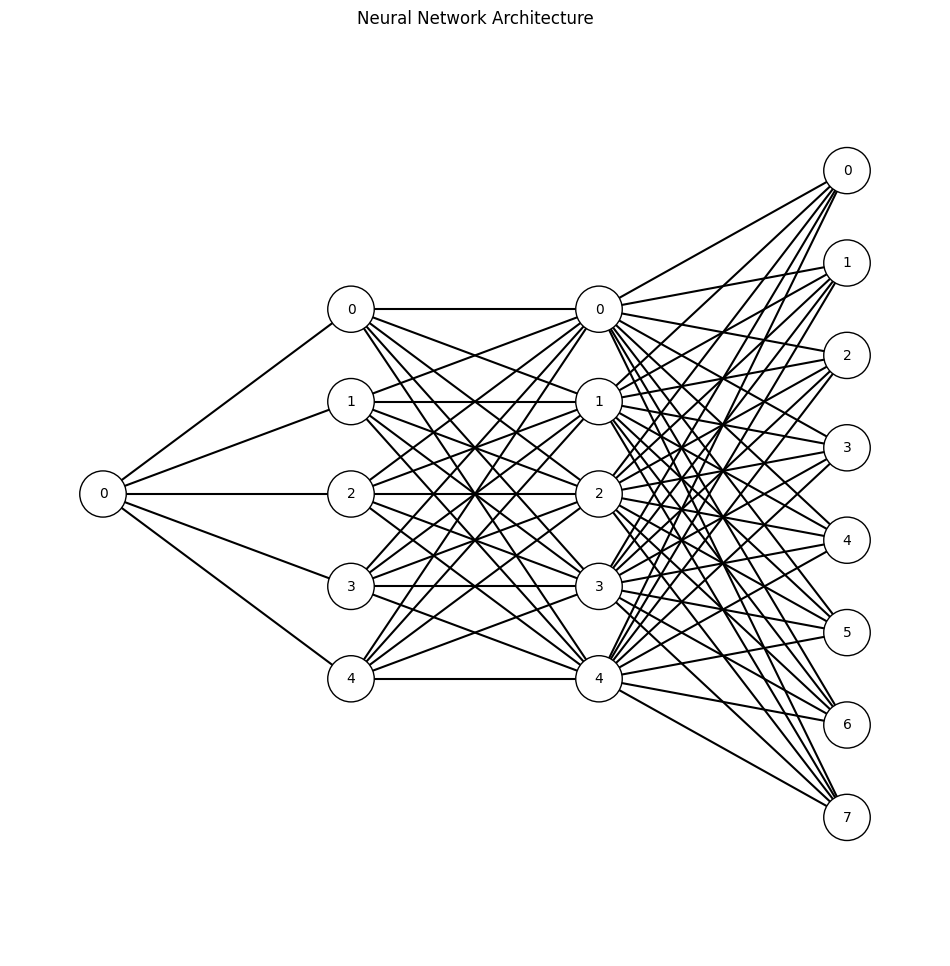

In [88]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle
from sklearn.neural_network import MLPClassifier

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotlib.
    
    :param ax: matplotlib.axes.Axes, the axes on which to plot the cartoon (get e.g. by plt.gca())
    :param left: float, the center of the leftmost node(s) will be placed here
    :param right: float, the center of the rightmost node(s) will be placed here
    :param bottom: float, the center of the bottommost node(s) will be placed here
    :param top: float, the center of the topmost node(s) will be placed here
    :param layer_sizes: list of int, list containing the number of nodes in each layer
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)

    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Annotation for nodes
            ax.text(n*h_spacing + left, layer_top - m*v_spacing, '{}'.format(m), ha='center', va='center', zorder=5)

    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

# Load the classifier
with open('classifier_nn.pkl', 'rb') as f:
    clf = pickle.load(f)

# Define the architecture of the network
if isinstance(clf.hidden_layer_sizes, int):
    layer_sizes = [clf.n_features_in_] + [clf.hidden_layer_sizes] + [clf.n_outputs_]
else:
    layer_sizes = [clf.n_features_in_] + list(clf.hidden_layer_sizes) + [clf.n_outputs_]

# Plot the neural network
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
plt.title('Neural Network Architecture')
plt.show()

In [91]:
import os
import numpy as np

def load_weights():
  weights = {}
  for filename in os.listdir('.'):
    if filename.startswith("weights_") and filename.endswith(".npy"):
      weight_name = filename.split(".")[0].split("_")[1]
      weights[weight_name] = np.load(os.path.join('.', filename))
  return weights

def load_biases():
  biases = {}
  for filename in os.listdir('.'):
    if filename.startswith("biases_") and filename.endswith(".npy"):
      biases_name = filename.split(".")[0].split("_")[1]
      biases[biases_name] = np.load(os.path.join('.', filename))
  return biases

In [102]:
import csv

weights = load_weights()
biases = load_biases()

# Save weights
with open('weights.csv', "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    for weight_name, weight_data in weights.items():
        writer.writerow([weight_name])  # Write weight name as a separate row
        writer.writerows(weight_data.tolist())  # Write weight data

# Save biases
with open('biases.csv', "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    for bias_name, bias_data in biases.items():
      writer.writerow([bias_name])  # Write bias name as a separate row
      writer.writerow(bias_data.tolist())  # Write bias data as a single row
      
def load_weights_biases_from_csv(weights_filename="weights.csv", biases_filename="biases.csv"):
  weights = {}
  biases = {}

  # Read weights file
  with open(weights_filename, "r") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
      if len(row) == 1:
        weight_name = row[0]
        weights[weight_name] = []
      else:
        weights[weight_name].append([float(val) for val in row])  # Convert string values to floats

  # Read biases file
  with open(biases_filename, "r") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
      bias_name = row[0]
      biases[bias_name] = [float(val) for val in row]  # Convert string values to floats

  return weights, biases

In [103]:
import numpy as np
import csv
import sys
sys.path.append('./')  # Add the directory to the path (if needed)
import mlp_custom

weights, biases = load_weights_biases_from_csv()
print(weights)
print(biases)

clf = mlp_custom.MLP(weights, biases)

output = clf.predict(0.05)
print(output)


{'0': [[-1.6058344903722427e-260, 4.527837366534739e-183, 9.250149721636868, -7.238824162914382, -8.752325425029763]], '1': [[-1.1022617602380367e-196, -4.562984775512221e-198, 4.794575873099823e-221, 2.00685027870523e-231, -1.2232784916096145e-223], [-8.213956782735856e-224, -4.1546296632432355e-251, -9.57778142544329e-303, 1.3413874378428862e-290, 8.322038768877587e-248], [5.531739505087773, -9.996272584902129e-216, 2.4394890307045064e-248, -2.7292679786445078, -4.866381115721921e-298], [-3.4476868624904307, -2.196240285281378e-228, -4.1305839242748637e-305, 6.551245100921984, 7.503339007409286e-201], [-8.399824527524993, -2.321633287521397e-221, 1.5243065170132373e-203, 10.747590415283137, -5.656132798391403e-199]], '2': [[-1.2662247814023846, 1.2253033152503605, 2.0346694259343736, 0.691578145506741, -2.863889178799668, -6.056716044011025, -0.11731360857899983, 2.6791817795066164], [1.8905625709577031e-298, -2.099189706163412e-232, -2.558864203008358e-207, -2.882142260444737e-240, 

In [76]:
output = clf.predict(0.5)
print(output)

[[0.         4.02717769 0.32720663 2.89754099 0.         0.
  0.         0.        ]]
